### Student Information
Name: Julianna Villa-Real

Student ID: 111006214

GitHub ID: sashijuls


---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

### Task 1 

In [ ]:
# Exercise 2
grouped_counts = X.groupby('category_name').size().reset_index(name='counts')
print(grouped_counts)

In [ ]:
# Exercise 5
'''
The .isnull() method did not work as expected because it only identifies certain specific values as "missing." By default, .isnull() considers np.nan and None as missing values, but it does not recognize empty strings ('') or non-standard missing value indicators (like custom strings such as 'NaN') as missing.

Observations
In the DataFrame, the missing_example column contains:

np.nan (standard representation for missing data in NumPy),
None (Python's native missing value representation),
empty strings (''),
and possibly custom strings like 'NaN'.
When .isnull() is applied, it only flags np.nan and None as missing (True), while empty strings and custom strings like 'NaN' are not flagged as missing (False).

Explanation
.isnull() did not work for empty strings because Pandas does not treat empty strings ('') as missing values by default. Instead, only values explicitly defined as np.nan or None are considered missing. This is why .isnull() returned False for the rows with empty strings.

Solution
We can replace empty strings with np.nan before applying .isnull()
'''
import numpy as np
import pandas as pd

NA_dict = [
    {'id': 'A', 'missing_example': np.nan},
    {'id': 'B', 'missing_example': ''},
    {'id': 'C', 'missing_example': 'NaN'},
    {'id': 'D', 'missing_example': None},
    {'id': 'E', 'missing_example': None},
    {'id': 'F', 'missing_example': ''}
]
NA_df = pd.DataFrame(NA_dict, columns=['id', 'missing_example'])

# Replace empty strings with np.nan
NA_df['missing_example'].replace('', np.nan, inplace=True)

# .isnull() will identify missing cases
NA_df['missing_example'].isnull()

# Exercise 6
The sampled DataFrame X_sample differs from original DataFrame X:

Size:  The DataFrame X migh contain more than 1,000 records, X_sample is a subset with 1,000 randomly selected records.
Random Selection: Rows in X_sample are selected randomly, so they vary with each sample unless a random seed is set.
Index: X_sample keeps the original indices from X, which results in non-sequential indices.

In [ ]:
# Exercise 8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data 
data1 = {'category_name': ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'],
         'count': [599, 594, 584, 480]}
data2 = {'category_name': ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'],
         'count': [300, 300, 250, 200]}

# dictionaries to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Set category names 
categories = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']
df1 = df1.set_index('category_name').reindex(categories).fillna(0)
df2 = df2.set_index('category_name').reindex(categories).fillna(0)

width = 0.35  # The Width of each bar
x = np.arange(len(categories))  # X positions for each category

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars 
ax.bar(x - width/2, df1['count'], width, label='category_name', color='blue')
ax.bar(x + width/2, df2['count'], width, label='category_name', color='orange')

# labels, title, and ticks
ax.set_xlabel('Category Name')
ax.set_ylabel('Count')
ax.set_title('Category Distribution')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=0)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [ ]:
# Exercise 10
# Get the indices of non-zero elements in fifth document
non_zero_indices = X_counts[4].nonzero()[1]

# Retrieve second non-zero index
second_term_index = non_zero_indices[1]

# Use second term index to get corresponding word from vocabulary
feature_names = count_vect.get_feature_names_out()
second_word = feature_names[second_term_index]
second_word

In [ ]:
# Exercise 11
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert sparse matrix to dense format for a sample
# Select first 50 documents and 50 terms for visualization
sample_X_counts = X_counts[:50, :50].toarray()

# Create DataFrame with term names as columns and document names as index
terms = count_vect.get_feature_names_out()[:50]
doc_labels = [f'doc_{i}' for i in range(1, 51)]
df_sample = pd.DataFrame(sample_X_counts, index=doc_labels, columns=terms)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample, cmap="YlGnBu", cbar=True, annot=False)
plt.title("Sample Term-Document Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

In [ ]:
# Exercise 12
import numpy as np
import plotly.express as px
import pandas as pd

# Assuming X_counts is a 2D matrix with term counts (rows: documents, columns: terms)
# For example, if using sklearn's CountVectorizer, X_counts can be X.toarray()

# Calculate term frequencies (sum of each column)
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Get feature names
feature_names = count_vect.get_feature_names_out()  # Assuming `vectorizer` is your CountVectorizer instance

# Create a DataFrame for Plotly
df = pd.DataFrame({
    'Term': feature_names,
    'Frequency': term_frequencies
})

# Sort terms by frequency for better visualization
df = df.sort_values(by="Frequency", ascending=False)

# Create an interactive bar chart with Plotly
fig = px.bar(df, x='Term', y='Frequency', title="Interactive Term Frequency Distribution")
fig.update_layout(xaxis_title="Terms", yaxis_title="Frequency", xaxis_tickangle=90)
fig.show()

In [ ]:
# Exercise 13
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_counts is a 2D matrix with term counts (rows: documents, columns: terms)
# For example, if using sklearn's CountVectorizer, X_counts can be X.toarray()

# Calculate the term frequencies (sum of each column)
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Set a threshold to filter terms (e.g., top 50 terms)
top_n_terms = 50
top_term_indices = np.argsort(term_frequencies)[-top_n_terms:]  # Indices of top N terms

# Filter X_counts to only include the top terms
X_counts_filtered = X_counts[:, top_term_indices]

# Get the feature names of the top terms
feature_names = np.array(count_vect.get_feature_names_out())  # Assuming `vectorizer` is your CountVectorizer instance
top_feature_names = feature_names[top_term_indices]

# Plot the frequencies of the top terms
plt.figure(figsize=(12, 6))
sns.barplot(x=top_feature_names, y=term_frequencies[top_term_indices])
plt.xticks(rotation=90)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Top 50 Term Frequencies")
plt.tight_layout()
plt.show()


In [ ]:
# Exercise 14
import numpy as np
import pandas as pd
import plotly.express as px

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
feature_names = count_vect.get_feature_names_out()

# Create a DataFrame and sort by frequency
df = pd.DataFrame({
    'Term': feature_names,
    'Frequency': term_frequencies
}).sort_values(by="Frequency", ascending=False)

# Plot with Plotly
fig = px.line(df, y="Frequency", title="Long Tail Distribution of Term Frequencies")
fig.update_traces(line=dict(color="orange"))
fig.update_layout(
    xaxis_title="Terms (sorted by frequency)",
    yaxis_title="Frequency",
    showlegend=False
)
fig.update_xaxes(showticklabels=False)  # Hide x-axis labels to reduce clutter
fig.show()

In [ ]:
# Exercise 15
# Answer here
import math
import plotly.express as px
import pandas as pd

# Log transform the term frequencies to make them more readable
term_frequencies_log = [math.log(i) if i > 0 else 0 for i in term_frequencies]

# Create a DataFrame and sort by frequency (if not already sorted)
df_log = pd.DataFrame({
    'Term': feature_names,
    'Log_Frequency': term_frequencies_log
}).sort_values(by="Log_Frequency", ascending=False)

# Plot using Plotly
fig = px.bar(df_log.head(300), x="Term", y="Log_Frequency", title="Log Distribution of Term Frequencies (Top 300 Terms)")
fig.update_layout(
    xaxis_title="Terms (sorted by log frequency)",
    yaxis_title="Log Frequency",
    showlegend=False
)
fig.show()

**Exercise 16**
The filtered vocabulary in each category highlights unique/shared patterns in language use. Common words like *"the," "to," "of,"* and *"and"* show up consistently in the top 5% across all categories. Beyond these shared terms, each category’s most frequent words align with its distinct themes. In *comp.graphics,* words like *"distributed"* and *"multi"* suggest the discussions centered around tech. In *soc.religion.christian* has words such as *"pagan"* and *"claims,"* indicating theological/religious debates or belief, while *sci.med* includes *"toxic"* and *"genetic,"* lean towards scientific and medical topics. In *alt.atheism,* high-frequency words like *"court"* and *"lot"* imply a focus on legal discussions or personal opinions surrounding atheism/religion.

The least frequent words in the bottom 1% provide insight into each category’s niche vocabulary. For example, *comp.graphics* includes rare terms like *"initworld"* and *"l4v,"* which likely refer to specific functions or software elements, while *soc.religion.christian* features words such as *"remarriage"* and *"pagan,"* leaning more specialized theological or social topics. *sci.med* has words like *"íålittin"* and *"infallible,"* which is rare but relevant in scientific discussuions, and *alt.atheism* includes terms like *"zyklon"* and *"disqualified,"* may point to historical debates/controversial discussions. Words in the bottom 1% tend to be more highly specific, highlighting sub-topics within each category.

In [ ]:
# Exercise 17
import time
import pandas as pd
from FAE_Top_K import FAETopK  # Placeholder for the actual FAE Top-K algorithm
from Max_FPGrowth import MaxFPgrowth  # Placeholder for the actual MaxFPgrowth algorithm

# Load the "comp.graphics" dataset
data_file = 'fre_rec_db_comp_graphics.csv'
df = pd.read_csv(data_file)

# Define k values and support thresholds
k_values = [500, 1000, 1500]
support_thresholds = [3, 6, 9]

# Store results
results = []

# Running FAE Top-k algorithm with different k values
for k in k_values:
    fae_topk = FAETopK(k=k)  # Initialize with current k
    start_time = time.time()
    fae_topk.run(df)  # Run the algorithm on the dataset
    runtime = time.time() - start_time
    results.append({
        'Algorithm': 'FAE Top-K',
        'k': k,
        'Support Threshold': None,
        'Runtime (s)': runtime
    })
    print(f"FAE Top-K | k={k} | Runtime: {runtime:.4f} seconds")

# Running MaxFPgrowth algorithm with different support thresholds
for support in support_thresholds:
    maxfpgrowth = MaxFPgrowth(support=support)  # Initialize with current support threshold
    start_time = time.time()
    maxfpgrowth.run(df)  # Run the algorithm on the dataset
    runtime = time.time() - start_time
    results.append({
        'Algorithm': 'MaxFPgrowth',
        'k': None,
        'Support Threshold': support,
        'Runtime (s)': runtime
    })
    print(f"MaxFPgrowth | Support={support} | Runtime: {runtime:.4f} seconds")

# Display results
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
# Exercise 18
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 5))

# First angle
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=X['category_name'], cmap='viridis', marker='o')
ax1.view_init(30, 30)  # Adjust view angle
ax1.set_title("Angle 1")

# Second angle
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=X['category_name'], cmap='viridis', marker='o')
ax2.view_init(30, 120)  # Different angle
ax2.set_title("Angle 2")

# Third angle
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=X['category_name'], cmap='viridis', marker='o')
ax3.view_init(30, 210)  # Another different angle
ax3.set_title("Angle 3")

plt.show()

In [ ]:
# Exercise 19

# I ran each line of code in their own separate cells 

mlb = preprocessing.LabelBinarizer()
X['bin_category_name'] = mlb.fit_transform(X['category_name']).tolist()
X['bin_category_name'].head()

---

### Task 2 and 3

In [1]:
pip install --upgrade huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [3]:
!pip install datasets

In [5]:
from datasets import load_dataset

dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = dataset['train'].to_pandas()  # Convert to a DataFrame

In [6]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


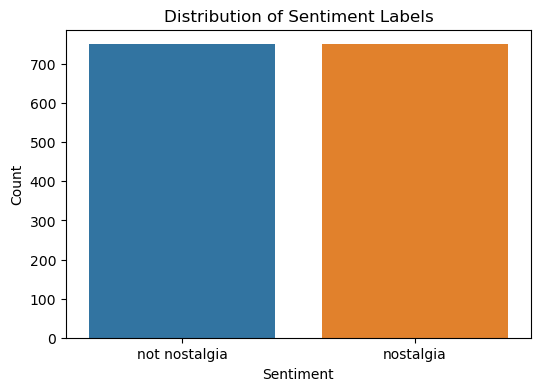

In [7]:
#In this cell we plot distribution of the two sentiment labels (nostalgia and not nostalgia)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels")
plt.show()


In [8]:
# In this cell we do Preprocessing and Tokenization

import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a simple text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

# Apply preprocessing to the 'comment' column
df['cleaned_comment'] = df['comment'].apply(preprocess_text)


### TF - IDF feature extraction

In [9]:
# in this code we generate TDF-IDF Features

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_tfidf = tfidf_vect.fit_transform(df['cleaned_comment'])

# Check the shape of the TF-IDF feature matrix
print("TF-IDF matrix shape:", X_tfidf.shape)


TF-IDF matrix shape: (1500, 1000)


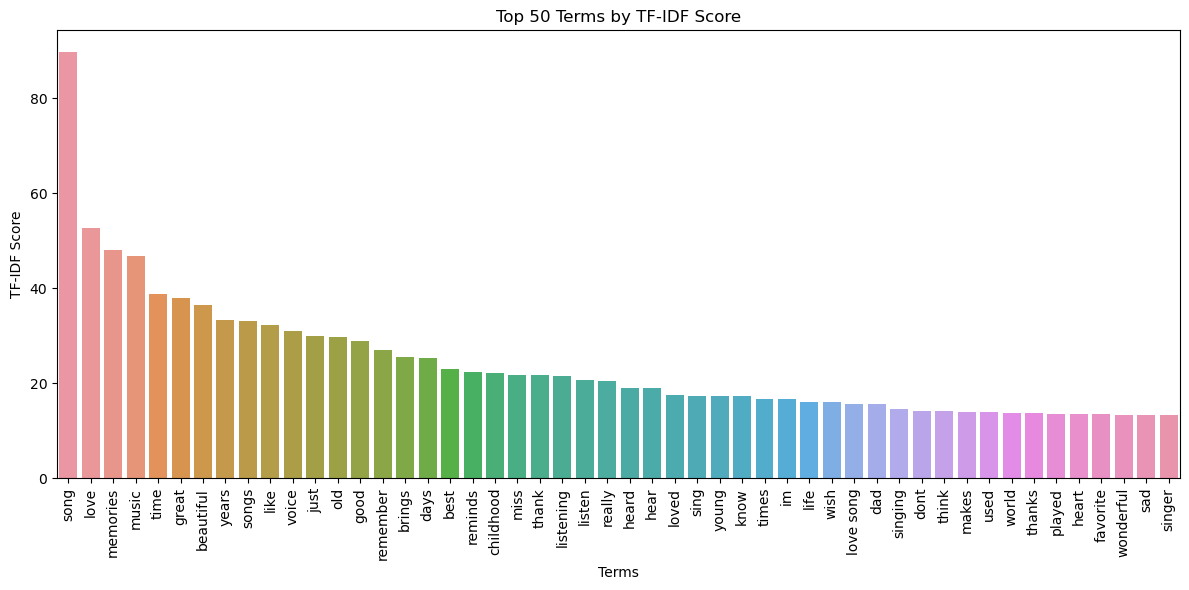

In [17]:
# in this cell we visualize top terms

import numpy as np

# Sum the TF-IDF scores for each term
term_frequencies = np.asarray(X_tfidf.sum(axis=0)).flatten()
top_term_indices = term_frequencies.argsort()[-50:][::-1]  # Top 50 terms

# Get feature names for the top terms
top_feature_names = np.array(tfidf_vect.get_feature_names_out())[top_term_indices]

# Plot the top 50 terms
plt.figure(figsize=(12, 6))
sns.barplot(x=top_feature_names, y=term_frequencies[top_term_indices])
plt.xticks(rotation=90)
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.title("Top 50 Terms by TF-IDF Score")
plt.tight_layout()
plt.show()


### Next we do the Naive Beyes Classifictaion

In [11]:
from sklearn.model_selection import train_test_split

# Encode sentiment labels
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment_label'], test_size=0.3, random_state=42)


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['not nostalgia', 'nostalgia']))


Accuracy: 0.8377777777777777
               precision    recall  f1-score   support

not nostalgia       0.90      0.76      0.82       225
    nostalgia       0.79      0.91      0.85       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



### In the next 3 cells we will improve the preformace

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=['not nostalgia', 'nostalgia']))


Logistic Regression Accuracy: 0.8844444444444445
               precision    recall  f1-score   support

not nostalgia       0.86      0.92      0.89       225
    nostalgia       0.91      0.85      0.88       225

     accuracy                           0.88       450
    macro avg       0.89      0.88      0.88       450
 weighted avg       0.89      0.88      0.88       450



In [14]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for MultinomialNB
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'alpha': 0.5}
Best cross-validation accuracy: 0.8523809523809524


In [18]:
tfidf_vect = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Using unigrams and bigrams
X_tfidf = tfidf_vect.fit_transform(df['cleaned_comment'])


### Model Interpretation

In [19]:
# Get feature weights for Logistic Regression
feature_weights = lr_classifier.coef_.flatten()
top_positive_indices = feature_weights.argsort()[-10:][::-1]  # Top 10 positive words
top_negative_indices = feature_weights.argsort()[:10]  # Top 10 negative words

top_positive_words = np.array(tfidf_vect.get_feature_names_out())[top_positive_indices]
top_negative_words = np.array(tfidf_vect.get_feature_names_out())[top_negative_indices]

print("Top nostalgic words:", top_positive_words)
print("Top non-nostalgic words:", top_negative_words)


Top nostalgic words: ['memorable' 'reminds childhood' 'yes' 'right' 'broken' 'club' 'message'
 'shame' 'dear' 'nearly']
Top non-nostalgic words: ['time hear' 'little girl' 'vocals' 'voice' 'nostalgia' 'movie' 'tune'
 'record' 'music like' 'walker']


### Findings/Observation
***Model Performance:***

The Logistic Regression model ended up performing best, with an accuracy of about 88.4%. It did especially well in identifying nostalgic content (precision of 0.91 and recall of 0.85), so it seems like it’s good at recognizing nostalgic themes. Overall, the precision, recall, and F1-score averages around 0.88–0.89 across both classes, which is pretty solid.

***Parameter Tuning:***

I tried tuning the alpha parameter for the Multinomial Naive Bayes model using a grid search. The best alpha value was 0.5, and the model’s cross-validation accuracy was around 85.2%. So, while tuning helped improve Naive Bayes, it still wasn’t as accurate as Logistic Regression.

***Key Words:***

Looking at the most important words in each class:
Nostalgic Words: Words like "memorable," "reminds childhood," "yes," "right," and "broken" came up a lot. These make sense as nostalgic words since they’re kind of emotional and memory-driven.
Non-Nostalgic Words: Words like "time hear," "little girl," "vocals," "voice," and "movie" were more common for non-nostalgic content. These seem more descriptive or neutral.

***Feature/Tuning:***

Using TF-IDF with unigrams and bigrams seemed to help capture key phrases (like "reminds childhood") that add to the nostalgia vibe. Also, tuning the alpha parameter in Naive Bayes gave it a bit of a boost, but it didn’t beat Logistic Regression in the end.
Overall, the Logistic Regression with TF-IDF features was the best setup. The nostalgic words lined up well with what we’d expect, focusing on memories and emotions, while non-nostalgic words were more neutral.


---

### Task 4

Data Transformation for Tabular Format: The lab use transforming data dictionaries into a Pandas DataFrame for structured data processing. This step could be improved by directly applying methods that suit the data’s characteristics, particularly for categorical and text-heavy datasets. For example, implementing label encoding for categorical variables and filtering common or irrelevant words before the tabular transformation would reduce data size and complexity, allowing for faster and more efficient analyses. This approach aligns the dataset with formats better suited to machine learning tasks without excessive transformations later.

Text Tokenization and Feature Extraction: The current tokenization approach uses a basic tokenizer that introduces noise by including irrelevant tokens, such as emails, punctuation, and stop words. An improved approach would be to use a custom tokenizer to remove such unnecessary elements and focus only on informative tokens. Tools like spaCy or advanced settings in nltk can assist with this, providing capabilities to tokenize, lemmatize, and exclude stop words. Such pre-processing would result in cleaner text data, leading to higher-quality feature extraction and better model training results in subsequent stages.

High Dimensionality in Term-Document Matrix: The term-document matrix created with CountVectorizer contains a very high number of dimensions due to the inclusion of all tokens as individual features. This makes computations on the matrix computationally intensive and may include many irrelevant or low-importance terms. Dimensionality reduction techniques like TF-IDF or Latent Semantic Analysis (LSA) could be applied here to prioritize more meaningful words and reduce noise. Another improvement is to set a minimum frequency threshold to remove less common terms, which will not only make the matrix more manageable but also focus on more informative features.

Handling Missing Values: In the lab, rows with missing values are simply dropped, which can lead to data loss and potentially alter the dataset’s representation. A more efficient approach would involve filling missing values using appropriate imputation methods, such as replacing missing numerical values with the mean or median and filling categorical missing values with the mode. This would retain a larger portion of the dataset and ensure that analyses and models have sufficient information without sacrificing data quality.

Sampling for Data Subsetting: The lab’s random sampling approach is effective for reducing dataset size but may inadvertently skew the representation of categories, especially when dealing with imbalanced data. Stratified sampling, which ensures that each category is proportionally represented, could offer a more balanced and accurate subset for analysis. By maintaining a representative distribution across the sample, stratified sampling enhances the validity of insights drawn from the subset, making it better suited for generalization and classification tasks.

Visualization of High-Dimensional Data: Visualizing large datasets and term distributions can be computationally expensive and difficult to interpret in high-dimensional space. Dimensionality reduction techniques, such as PCA or t-SNE, could be applied to the term-document matrix to reduce complexity while retaining key patterns. Additionally, instead of visualizing individual terms, aggregating them into category-level term distributions could simplify the analysis, helping to reveal insights without overwhelming the visualization with noise. This approach makes visual interpretations clearer and more meaningful, facilitating a deeper understanding of category relationships within the data.